# Module 2: Data wrangling using `pandas`

Course: GEOL 557 Earth Resource Data Science I: Fundamentals

created by Zane Jobe and Thomas Martin, Colorado School of Mines https://core.mines.edu

## Overview
This notebook will take you through python code tot import, sort, and make some very basic plots of some U-Pb detrital zircon geochronology data using `pandas`.

# TO DO: change path to GEOL_557

In [ ]:
import pandas as pd # this imports pandas to this notebook
import numpy as np

from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive')

# these next two things shuoldnt need to be changed if you set up your Google Drive folder correctly (see Module 1)
folder_path = 'gdrive/My Drive/1_PythonCourse/Mines-ERDS/module_2/' # makes a path
file_name = 'Sharman_ExampleDataset_1.xlsx' # file name

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Let's load in a dataset
The data we want is located here https://github.com/grsharman/detritalPy/blob/master/detritalPy/example-data/ExampleDataset_1.xlsx

It is downloaded and saved in the Google Drive folder. 

We load it with the pandas `read_xls` function into a DataFrame called `df`:

In [ ]:
df=pd.read_excel(folder_path + file_name, sheet_name='ZrUPb') # uses pandas to read in the csv as a 'DataFrame' called df
df.head()

,Sample_ID,Grain_ID,Analysis_ID,206Pb_204Pb,U_ppm,U_Th,Th_U,207Pb_206Pb,207Pb_206Pb_err,207Pb_235U,207Pb_235U_err,206Pb_238U,206Pb_238U_err,RHO,75Age,75Age_err,68Age,68Age_err,76Age,76Age_err,BestAge,BestAge_err,Disc,ZHe_Age,ZHe_Age_err,RimCore
0,POR-2,NaN,POR-2-64,187.562603,2454.0,1.593317,0.627621,0.040688,0.005553,0.037519,0.005168,0.006688,0.000125,0.135763,37.399354,5.057732,42.969196,0.800852,-307.078907,350.590494,42.969196,0.800852,NaN,NaN,NaN,NaN
1,POR-2,NaN,POR-2-85,400.690026,1830.0,2.015693,0.496107,0.046028,0.007520,0.046150,0.007567,0.007272,0.000102,0.085380,45.811084,7.344985,46.708420,0.651555,-0.892810,396.082033,46.708420,0.651555,NaN,NaN,NaN,NaN
2,POR-2,NaN,POR-2-33,1727.768911,18460.0,19.197699,0.052090,0.046373,0.000795,0.048013,0.001294,0.007509,0.000156,0.771603,47.617402,1.253983,48.226943,0.999377,17.007509,41.201972,48.226943,0.999377,NaN,NaN,NaN,NaN
3,POR-2,NaN,POR-2-82,1535.301774,19514.0,5.805308,0.172256,0.046624,0.001008,0.048465,0.001398,0.007539,0.000144,0.661991,48.054842,1.354198,48.417302,0.921306,30.016655,51.812993,48.417302,0.921306,NaN,NaN,NaN,NaN
4,POR-2,NaN,POR-2-7,299.211125,2332.0,1.529990,0.653599,0.042033,0.004611,0.044318,0.004887,0.007647,0.000086,0.101562,44.031205,4.751929,49.108359,0.547924,-224.552689,276.898362,49.108359,0.547924,NaN,NaN,NaN,NaN


Nice! Let's make sure the dtypes are correct:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample_ID        1184 non-null   object 
 1   Grain_ID         0 non-null      float64
 2   Analysis_ID      1184 non-null   object 
 3   206Pb_204Pb      589 non-null    float64
 4   U_ppm            1184 non-null   float64
 5   U_Th             1184 non-null   float64
 6   Th_U             1184 non-null   float64
 7   207Pb_206Pb      1184 non-null   float64
 8   207Pb_206Pb_err  1184 non-null   float64
 9   207Pb_235U       1184 non-null   float64
 10  207Pb_235U_err   1184 non-null   float64
 11  206Pb_238U       1184 non-null   float64
 12  206Pb_238U_err   1184 non-null   float64
 13  RHO              1184 non-null   float64
 14  75Age            1184 non-null   float64
 15  75Age_err        1183 non-null   float64
 16  68Age            1184 non-null   float64
 17  68Age_err     

Excellent - I wish all data files were formatted like that. Let's check out a description of the data:

In [ ]:
df.describe()

,Grain_ID,206Pb_204Pb,U_ppm,U_Th,Th_U,207Pb_206Pb,207Pb_206Pb_err,207Pb_235U,207Pb_235U_err,206Pb_238U,206Pb_238U_err,RHO,75Age,75Age_err,68Age,68Age_err,76Age,76Age_err,BestAge,BestAge_err,Disc,ZHe_Age,ZHe_Age_err,RimCore
count,0.0,589.000000,1.184000e+03,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1183.000000,1184.000000,1184.000000,625.000000,625.000000,1184.000000,1184.000000,0.0,0.0,0.0,0.0
mean,NaN,488.143662,1.535729e+04,2.660451,0.571404,0.053841,0.004100,0.449679,0.019499,0.039633,0.000837,0.306736,243.125603,25.622485,237.506342,4.827252,285.044004,289.446382,248.472298,4.791130,NaN,NaN,NaN,NaN
std,NaN,401.628866,6.010806e+04,3.485530,0.355032,0.018079,0.017931,1.377295,0.080965,0.070476,0.002002,0.223486,407.325742,22.957161,388.856896,9.456529,664.797347,327.423335,422.322410,8.445739,NaN,NaN,NaN,NaN
min,NaN,27.043019,2.330000e+01,0.325100,0.016160,0.018146,0.000143,0.037519,0.000850,0.006688,0.000049,-0.151990,-110.000000,1.253983,42.969196,0.310222,-3087.582303,0.000000,42.969196,0.310222,NaN,NaN,NaN,NaN
25%,NaN,212.240881,3.542250e+02,1.440044,0.351865,0.047596,0.000800,0.100513,0.003250,0.015208,0.000225,0.156162,90.995489,10.495260,97.261275,1.436355,13.499498,86.000000,97.261275,1.436355,NaN,NaN,NaN,NaN
50%,NaN,382.879604,1.582590e+03,2.039231,0.490381,0.049334,0.001432,0.144072,0.005756,0.021930,0.000345,0.251010,116.215936,19.099438,139.641154,2.176547,115.670764,186.132997,139.641154,2.176547,NaN,NaN,NaN,NaN
75%,NaN,639.357573,1.182978e+04,2.842000,0.694425,0.051800,0.004197,0.184492,0.016409,0.026100,0.000669,0.401253,169.754692,35.000000,166.050169,4.205218,241.342989,368.796567,166.050169,4.159157,NaN,NaN,NaN,NaN
max,NaN,2912.198355,1.217614e+06,61.881165,3.075977,0.260038,0.564884,22.230823,1.954081,0.620036,0.048457,0.998889,3193.867049,364.358079,3110.061838,208.441511,3246.929227,3309.686674,3246.929227,107.311590,NaN,NaN,NaN,NaN


In [ ]:
df.groupby('Sample_ID').BestAge.describe()

,count,mean,std,min,25%,50%,75%,max
Sample_ID,,,,,,,,
BUT-1,100.0,270.821084,432.974949,81.909284,104.723150,159.566275,197.770412,2840.000000
BUT-2,99.0,255.744154,415.649604,77.217434,98.253280,153.425129,172.497076,2240.000000
BUT-3,100.0,218.253463,344.665800,67.113260,96.926225,150.370502,164.220574,1850.000000
BUT-4,99.0,261.970724,392.254698,85.977323,143.788676,161.838069,168.596222,1797.899348
BUT-5,96.0,329.429600,550.431616,79.957142,97.059649,150.096633,170.723591,3246.929227
POR-1,100.0,200.023693,361.083596,43.435009,95.190867,103.187945,120.019771,1896.928018
POR-2,97.0,296.816210,528.122072,42.969196,95.091671,105.071041,123.492473,2468.478322
POR-3,101.0,190.515164,413.503765,45.138314,94.049496,103.518484,121.731815,3179.874635
SEF-1,99.0,197.404483,314.881477,79.781044,96.516449,145.490278,161.381595,1790.000000


In [ ]:
df.groupby('Sample_ID').size() # number of rows per sample

Sample_ID
BUT-1    100
BUT-2     99
BUT-3    100
BUT-4     99
BUT-5     96
POR-1    100
POR-2     97
POR-3    101
SEF-1     99
SJB-1     96
TEJ-1    100
TEJ-2     97
dtype: int64

In [ ]:
df.groupby('Sample_ID').BestAge.max() # oldest Age per sample (could also do min, mean, median, etc.)

Sample_ID
BUT-1    2840.000000
BUT-2    2240.000000
BUT-3    1850.000000
BUT-4    1797.899348
BUT-5    3246.929227
POR-1    1896.928018
POR-2    2468.478322
POR-3    3179.874635
SEF-1    1790.000000
SJB-1    2598.543911
TEJ-1    2030.000000
TEJ-2    1714.000000
Name: BestAge, dtype: float64

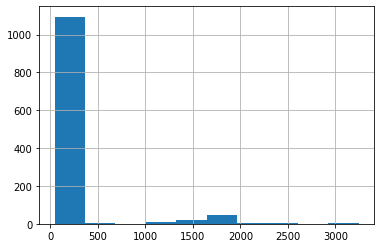

In [ ]:
df.BestAge.hist() # all ages as a histogram

BUT-1         AxesSubplot(0.1,0.736957;0.235294x0.163043)
BUT-2    AxesSubplot(0.382353,0.736957;0.235294x0.163043)
BUT-3    AxesSubplot(0.664706,0.736957;0.235294x0.163043)
BUT-4         AxesSubplot(0.1,0.541304;0.235294x0.163043)
BUT-5    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
POR-1    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
POR-2         AxesSubplot(0.1,0.345652;0.235294x0.163043)
POR-3    AxesSubplot(0.382353,0.345652;0.235294x0.163043)
SEF-1    AxesSubplot(0.664706,0.345652;0.235294x0.163043)
SJB-1             AxesSubplot(0.1,0.15;0.235294x0.163043)
TEJ-1        AxesSubplot(0.382353,0.15;0.235294x0.163043)
TEJ-2        AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

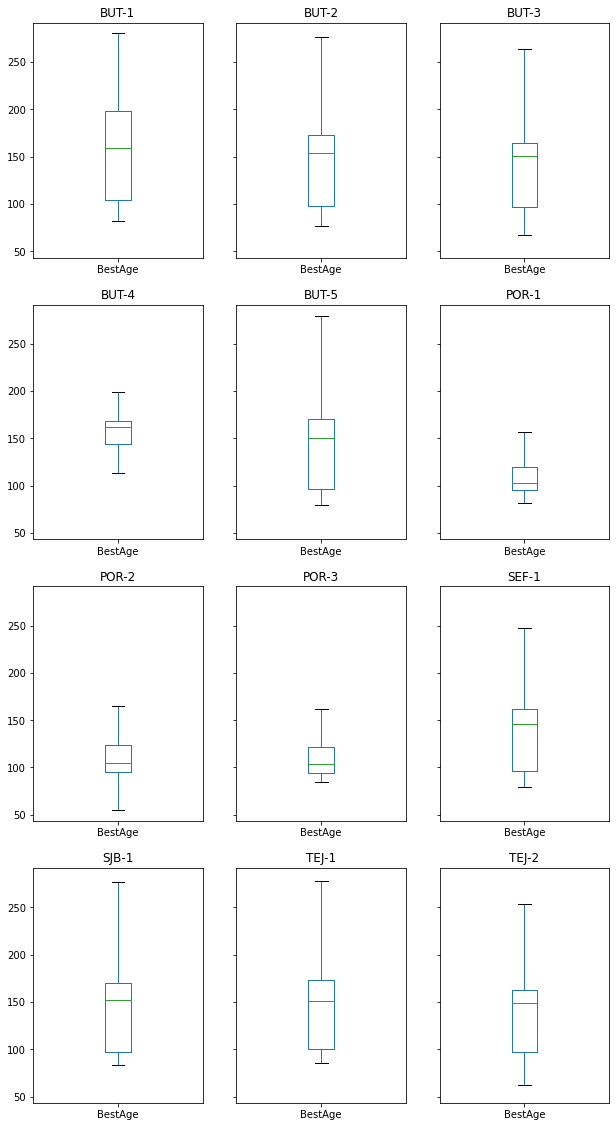

In [ ]:
# each sample as a separate box plot
df.groupby('Sample_ID').boxplot(column=['BestAge'], grid=False, showfliers=False, figsize=[10,20], sharey=True)